In [68]:
 # initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
from pathlib import Path
from dotenv import load_dotenv
import panel as pn
from panel.interact import interact
from panel import widgets

pn.extension("plotly")

%matplotlib inline

In [69]:
 # Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("mapbox_key")

In [70]:
# Read the census data into a Pandas DataFrame
file_path = Path("sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


In [71]:
 # Calculate the mean number of housing units per year (use groupby) 
avg_housing_units_by_year = sfo_data.groupby('year')['housing_units'].mean()
    

In [72]:
avg_housing_units_by_year.head()

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
Name: housing_units, dtype: int64

In [73]:
avg_housing_units_by_year.tail()

year
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

In [74]:
avg_housing_units_by_year.describe()

count         7.000000
mean     378401.000000
std        4206.000713
min      372560.000000
25%      375480.500000
50%      378401.000000
75%      381321.500000
max      384242.000000
Name: housing_units, dtype: float64

In [75]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.

min=avg_housing_units_by_year.min()
max=avg_housing_units_by_year.max()

avg_housing_units_by_year.hvplot.bar(xlabel = 'Year', ylabel='AVG Units', ylim = (min,max))

# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
# YOUR CODE HERE!


#plt.show()
#plt.close(fig_housing_units)

:Bars   [year]   (housing_units)

In [76]:
#In this section, you want to visualize the average gross rent per year to better understand the trends for rental income over time. 
#You will visualize the average (mean) gross rent per year and visualize it as a line chart.

#Calculate the mean gross for each year.
#Visualize the mean gross rent per year as a line chart.

In [77]:
# Calculate the average gross rent and average sale price per square foot
avg_gross_rent = sfo_data.groupby('year')['sale_price_sqr_foot','gross_rent'].mean()
avg_gross_rent

C:\Users\maxla\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528
2015,632.540352,3739
2016,697.643709,4390


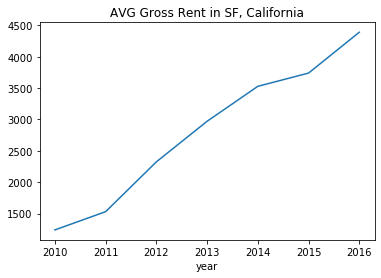

In [78]:
# Plot the Average Gross Rent per Year as a Line Chart 
avg_gross_rent = sfo_data.groupby('year')['gross_rent'].mean().plot(y='Avg Gross Rent', title = "AVG Gross Rent in SF, California")

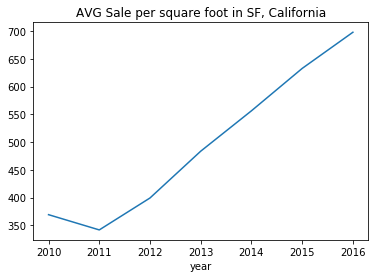

In [79]:
avg_sale_price = sfo_data.groupby('year')['sale_price_sqr_foot'].mean().plot(y='Avg sale per sqr foot', title = "AVG Sale per square foot in SF, California")

In [80]:
#Average Prices by Neighborhood
#use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

In [81]:
# Group by year and neighborhood and then create a new dataframe of the mean values
neighborhoods_mean_values = sfo_data.reset_index()


In [82]:
# Group by year and neighborhood and then create a new dataframe of the mean values
neighborhoods_mean_values.groupby(['year','neighborhood']).mean()
neighborhoods_mean_values.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


In [84]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood

def neighborhood_function(neighborhood):
    return neighborhoods_mean_values.loc[neighborhoods_mean_values['neighborhood']==neighborhood,:].hvplot(x='year',y='sale_price_sqr_foot')

choose_neighborhood = neighborhoods_mean_values['neighborhood']

interact(neighborhood_function, neighborhood = choose_neighborhood)
            

Column
    [0] Column
        [0] Select(name='neighborhood', options=['Alamo Square', ...], value='Alamo Square')
    [1] Row
        [0] HoloViews(Curve, name='interactive02344')

In [ ]:
#In this section, you will need to calculate the 
#mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. 
#Plot the results as a bar chart.